In [1]:
import Ab as ab
import datetime as dt
import matplotlib.pyplot as plt

sd = dt.datetime(1998,12,4)
ed = dt.datetime(2022,3,2)
qqq2 = ab.StockData('QQQ')
qqq2.get_data_from_yfinance('QQQ', sd, ed)

buy_and_hold = ab.BuyAndHold()
buy_and_hold.run_strategy(qqq2, sd,ed)

macross_strategy = ab.MACross(50, 200)
macross_strategy.run_strategy(qqq2, sd ,ed)

bt = ab.BackTest(sd, ed)
bt.run_backtest(buy_and_hold, qqq2)

ma_cross_bt = ab.BackTest(sd, ed)
ma_cross_bt.run_backtest(macross_strategy, qqq2)




[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

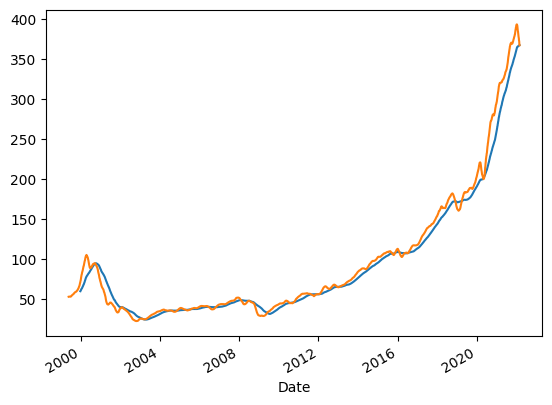

In [ ]:
#qqq2.data['Close'].plot()
qqq2.data['LongMA'].plot()
qqq2.data['ShortMA'].plot()

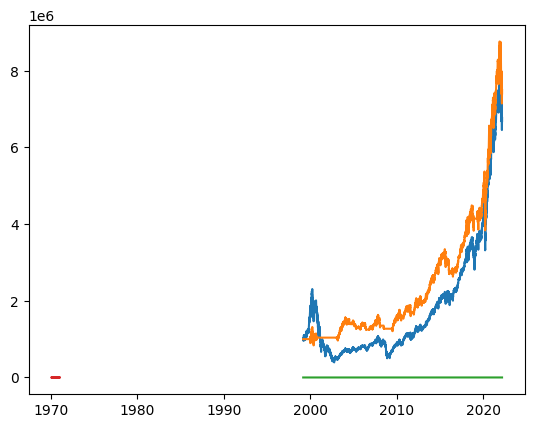

In [ ]:
plt.plot(bt.balance['Date'], bt.balance['Total'])
plt.plot(ma_cross_bt.balance['Date'], ma_cross_bt.balance['Total'])
plt.plot(qqq2.data.index, qqq2.data['Close'], qqq2.data['ShortMA'], qqq2.data['LongMA'])


In [ ]:
# iterate over range of dates
sd = dt.datetime(2000,1,1)
ed = dt.datetime(2015,1,1)

delta = ed - sd
result = []
for i in range(delta.days + 1):
    sd_5y = sd + dt.timedelta(days=i)
    ed_5y = sd + dt.timedelta(days=i) + dt.timedelta(days=365*5)
    buy_and_hold_strategy = ab.BuyAndHold()
    buy_and_hold_strategy.run_strategy(qqq2, sd_5y, ed_5y)
    bt = ab.BackTest(sd_5y, ed_5y)
    bt.run_backtest(buy_and_hold_strategy, qqq2)
    print(bt.balance)
    print(i, bt.balance['Total'].iloc[-1])

plt.plot(result)

NameError: name 'dt' is not defined